# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math


# Utilizando o DataFrame criado anteriormente

In [2]:
drugbank_df = pd.read_pickle('db_df')

# Transformando as colunas de dados númericos do DataFrame em float

In [3]:
cols = ['molecular_weight','logP','logS','pKa_Acid','pKa_Basic','physiological_charge',
'polar_surface_area','hydrogen_acceptor_count','hydrogen_donor_count','rotable_bond_count',
'refractivity','polarizability','number_of_rings','bioavailability']

for col in cols:
    drugbank_df[col] = drugbank_df[col].astype(np.float64)

In [4]:
def transforma_col(linha):
    if linha:
        return linha[:-4]
    else:
        return linha

drugbank_df['water_solubility'].apply(transforma_col).astype(np.float64).value_counts()

0.10500    20
0.01110    19
0.01120    17
0.01220    16
0.10400    15
           ..
0.00950     1
0.00003     1
0.00725     1
0.00776     1
0.03640     1
Name: water_solubility, Length: 4219, dtype: int64

# 1 Fazendo histogramas dos dados
1.1 Molecular weight

É estacionário

<AxesSubplot:>

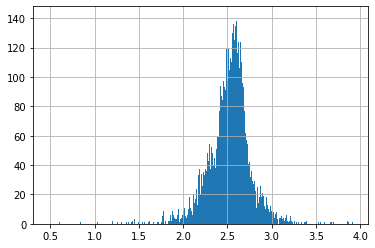

In [5]:
dfmw = drugbank_df['molecular_weight']

c0 = dfmw.isna() == False
c1 = dfmw > 0
dfmw = dfmw[c0 & c1] 

mwlog = dfmw.apply(np.log10)
mwlog.hist(bins = 700)

1.2 LogP

É estacionário

<AxesSubplot:>

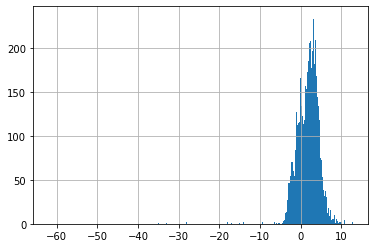

In [6]:
dflogp = drugbank_df['logP']

c0 = dflogp.isna() == False
dflogp = dflogp[c0] 

dflogp.hist(bins = 700)


1.3 LogS

É estacionário

<AxesSubplot:>

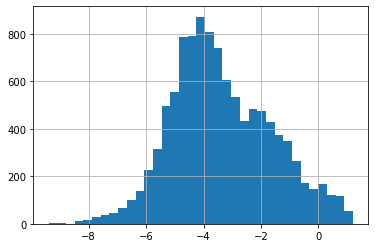

In [7]:
dflogs = drugbank_df['logS']

c0 = dflogs.isna() == False
dflogs = dflogs[c0] 

dflogs.hist(bins = 35)


1.4 pka acid

É estacionario

<AxesSubplot:>

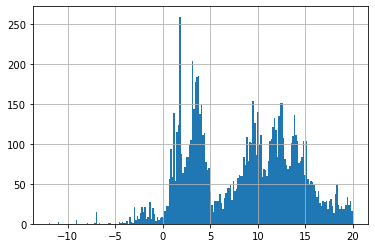

In [8]:
dfpka = drugbank_df['pKa_Acid']

c0 = dfpka.isna() == False
dfpka = dfpka[c0] 

dfpka.hist(bins = 200)


1.5 pka basic

É estacionario

<AxesSubplot:>

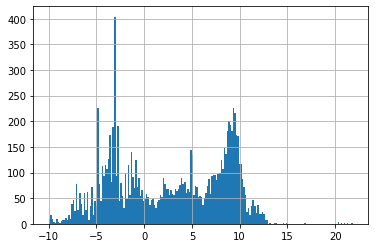

In [9]:
dfpkb = drugbank_df['pKa_Basic']

c0 = dfpkb.isna() == False
dfpkb = dfpkb[c0] 

dfpkb.hist(bins = 200)


1.6 Physiological Charge

É estacionario

<AxesSubplot:>

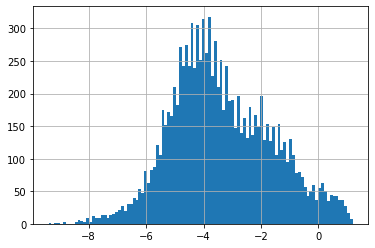

In [10]:
dfphy = drugbank_df['physiological_charge']

c0 = dfphy.isna() == False
dfphy = dfphy[c0] 

dfphy.hist(bins = 105)

1.7 Polar Surface Area

É estacionario

<AxesSubplot:>

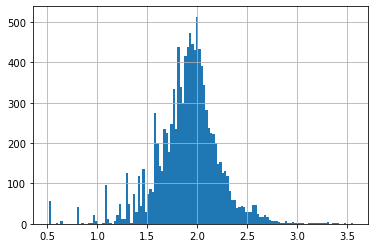

In [11]:

dfpsa = drugbank_df['polar_surface_area']
c0 = dfpsa.isna() == False
dfpsa = dfpsa[c0] 
c1 = dfpsa > 0
dfpsa = dfpsa[c0 & c1] 

dfpsalog = dfpsa.apply(np.log10)
dfpsalog.hist(bins= 130)

1.8 Hydrogen Acceptor Count

<AxesSubplot:>

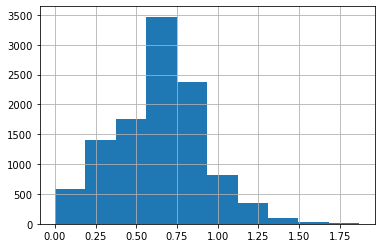

In [12]:
dfhac = drugbank_df['hydrogen_acceptor_count'][drugbank_df['hydrogen_acceptor_count'] <= 75]
c0 = dfhac.isna() == False
dfhac = dfhac[c0] 
c1 = dfhac > 0
dfhac = dfhac[c0 & c1] 

dfhaclog = dfhac.apply(np.log10)
dfhaclog.hist(bins= 10)


1.9 Hydrigen Donor Count

<AxesSubplot:>

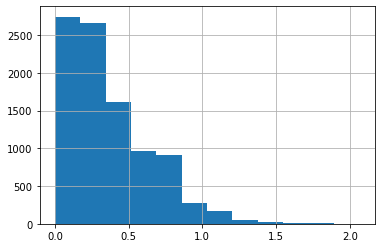

In [13]:


dfhdc = drugbank_df['hydrogen_donor_count']
c0 = dfhdc.isna() == False
dfhdc = dfhdc[c0] 
c1 = dfhdc > 0
dfhdc = dfhdc[c0 & c1] 

dfhdclog = dfhdc.apply(np.log10)
dfhdclog.hist(bins= 12)


1.10 Rotable Bond Count

<AxesSubplot:>

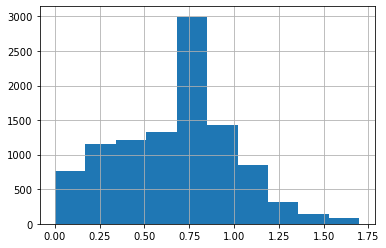

In [14]:
dfrbc = drugbank_df['rotable_bond_count'][drugbank_df['rotable_bond_count'] <= 50]

c0 = dfrbc.isna() == False
c1 = dfrbc > 0
dfrbc = dfrbc[c0 & c1] 

rbclog = dfrbc.apply(np.log10)
rbclog.hist(bins = 10)

1.11 Refractivity

<AxesSubplot:>

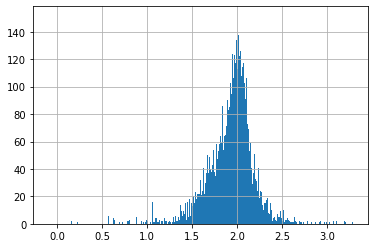

In [15]:
dfref = drugbank_df['refractivity']
c0 = dfref.isna() == False
c1 = dfref > 0
dfref = dfref[c0 & c1] 

reflog = dfref.apply(np.log10)
reflog.hist(bins = 700)



1.12 Polarizability

<AxesSubplot:>

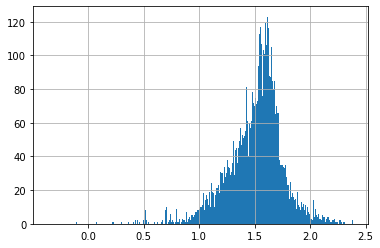

In [16]:
dfpol = drugbank_df['polarizability'][drugbank_df['polarizability'] <= 250]
c0 = dfpol.isna() == False
c1 = dfpol > 0
dfpol = dfpol[c0 & c1] 

pollog = dfpol.apply(np.log10)
pollog.hist(bins = 700)


1.13 Number of Rings

<AxesSubplot:>

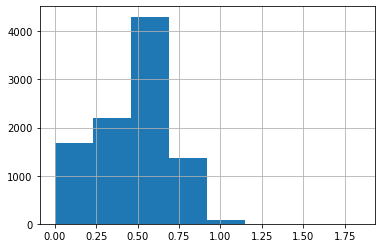

In [17]:
dfnor = drugbank_df['number_of_rings']
c0 = dfnor.isna() == False
c1 = dfnor > 0
dfnor = dfnor[c0 & c1] 

norlog = dfnor.apply(np.log10)
norlog.hist(bins = 8)


1.14 Bioavailability

<AxesSubplot:>

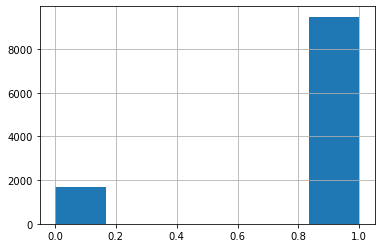

In [18]:
drugbank_df['bioavailability'].hist(bins = 6)

# 2 Dados estatísticos

In [19]:
numerical_columns = drugbank_df.describe().columns
df_numerical = drugbank_df[numerical_columns]
df_numerical.describe()

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability
count,11172.000000,11170.000000,10758.000000,9404.000000,10362.000000,10758.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11169.000000,11173.000000,11173.000000
mean,385.041182,1.812489,-3.381529,8.462630,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564
std,316.550921,2.650778,1.736293,5.428678,5.742671,1.736293,126.138432,6.054114,4.070047,8.888413,78.738375,30.736014,2.236808,0.358490
min,3.016000,-62.000000,-9.400000,-12.000000,-10.000000,-9.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.000000,0.000000
25%,246.253925,0.112500,-4.600000,3.510000,-2.900000,-4.600000,53.070000,3.000000,1.000000,3.000000,61.880000,23.660000,1.000000,1.000000
50%,342.924500,2.070000,-3.600000,9.200000,3.090000,-3.600000,83.120000,4.000000,2.000000,5.000000,91.580000,35.100000,3.000000,1.000000
75%,443.977000,3.540000,-2.200000,12.700000,8.350000,-2.200000,116.450000,6.000000,3.000000,8.000000,117.960000,45.140000,4.000000,1.000000
max,8272.338000,12.870000,1.200000,20.000000,21.850000,1.200000,3617.470000,191.000000,116.000000,176.000000,1931.710000,735.410000,69.000000,1.000000


2.1 Moda

In [20]:
drugbank_df.mode(numeric_only=True)

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability
0,180.1559,-1.4,-3.8,3.09,-3.0,-3.8,0.0,4.0,1.0,4.0,0.0,1.78,3.0,1.0


In [21]:
drugbank_df.corr()

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability
molecular_weight,1.000000,-0.053570,-0.441806,-0.084295,0.123586,-0.441806,0.878572,0.866301,0.779067,0.851705,0.961119,0.963787,0.681475,-0.523791
logP,-0.053570,1.000000,-0.777106,0.309851,-0.069548,-0.777106,-0.405862,-0.362444,-0.467964,-0.096115,0.046140,0.073587,0.207498,-0.025250
logS,-0.441806,-0.777106,1.000000,-0.178320,-0.028580,1.000000,0.021882,0.018652,0.107775,-0.341943,-0.551412,-0.524156,-0.491830,0.217076
pKa_Acid,-0.084295,0.309851,-0.178320,1.000000,0.078848,-0.178320,-0.226889,-0.203595,-0.201720,-0.120954,-0.005522,-0.013763,0.146316,0.149353
pKa_Basic,0.123586,-0.069548,-0.028580,0.078848,1.000000,-0.028580,0.106483,0.128973,0.139596,0.123446,0.186430,0.168035,0.159054,-0.047173
physiological_charge,-0.441806,-0.777106,1.000000,-0.178320,-0.028580,1.000000,0.021882,0.018652,0.107775,-0.341943,-0.551412,-0.524156,-0.491830,0.217076
polar_surface_area,0.878572,-0.405862,0.021882,-0.226889,0.106483,0.021882,1.000000,0.965670,0.940274,0.801840,0.833017,0.835106,0.492832,-0.468755
hydrogen_acceptor_count,0.866301,-0.362444,0.018652,-0.203595,0.128973,0.018652,0.965670,1.000000,0.887504,0.758506,0.817658,0.826533,0.560348,-0.467390
hydrogen_donor_count,0.779067,-0.467964,0.107775,-0.201720,0.139596,0.107775,0.940274,0.887504,1.000000,0.745604,0.745353,0.745216,0.361868,-0.426527
rotable_bond_count,0.851705,-0.096115,-0.341943,-0.120954,0.123446,-0.341943,0.801840,0.758506,0.745604,1.000000,0.853053,0.864377,0.345947,-0.503896


In [26]:
df_concat = pd.concat([mwlog, reflog, norlog, pollog, rbclog, dfhdclog,  dfhaclog, dfpsalog, dfphy, dfpkb, dfpka, dflogs, dflogp], axis =1)

In [23]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11173 entries, 5 to 14298
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   molecular_weight         11172 non-null  float64
 1   refractivity             11081 non-null  float64
 2   number_of_rings          9642 non-null   float64
 3   polarizability           11138 non-null  float64
 4   rotable_bond_count       10261 non-null  float64
 5   hydrogen_donor_count     9446 non-null   float64
 6   hydrogen_acceptor_count  10889 non-null  float64
 7   polar_surface_area       10941 non-null  float64
 8   physiological_charge     10758 non-null  float64
 9   pKa_Basic                10362 non-null  float64
 10  pKa_Acid                 9404 non-null   float64
 11  logS                     10758 non-null  float64
 12  logP                     11170 non-null  float64
dtypes: float64(13)
memory usage: 1.2 MB


array([[<AxesSubplot:title={'center':'molecular_weight'}>,
        <AxesSubplot:title={'center':'refractivity'}>,
        <AxesSubplot:title={'center':'number_of_rings'}>,
        <AxesSubplot:title={'center':'polarizability'}>],
       [<AxesSubplot:title={'center':'rotable_bond_count'}>,
        <AxesSubplot:title={'center':'hydrogen_donor_count'}>,
        <AxesSubplot:title={'center':'hydrogen_acceptor_count'}>,
        <AxesSubplot:title={'center':'polar_surface_area'}>],
       [<AxesSubplot:title={'center':'physiological_charge'}>,
        <AxesSubplot:title={'center':'pKa_Basic'}>,
        <AxesSubplot:title={'center':'pKa_Acid'}>,
        <AxesSubplot:title={'center':'logS'}>],
       [<AxesSubplot:title={'center':'logP'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

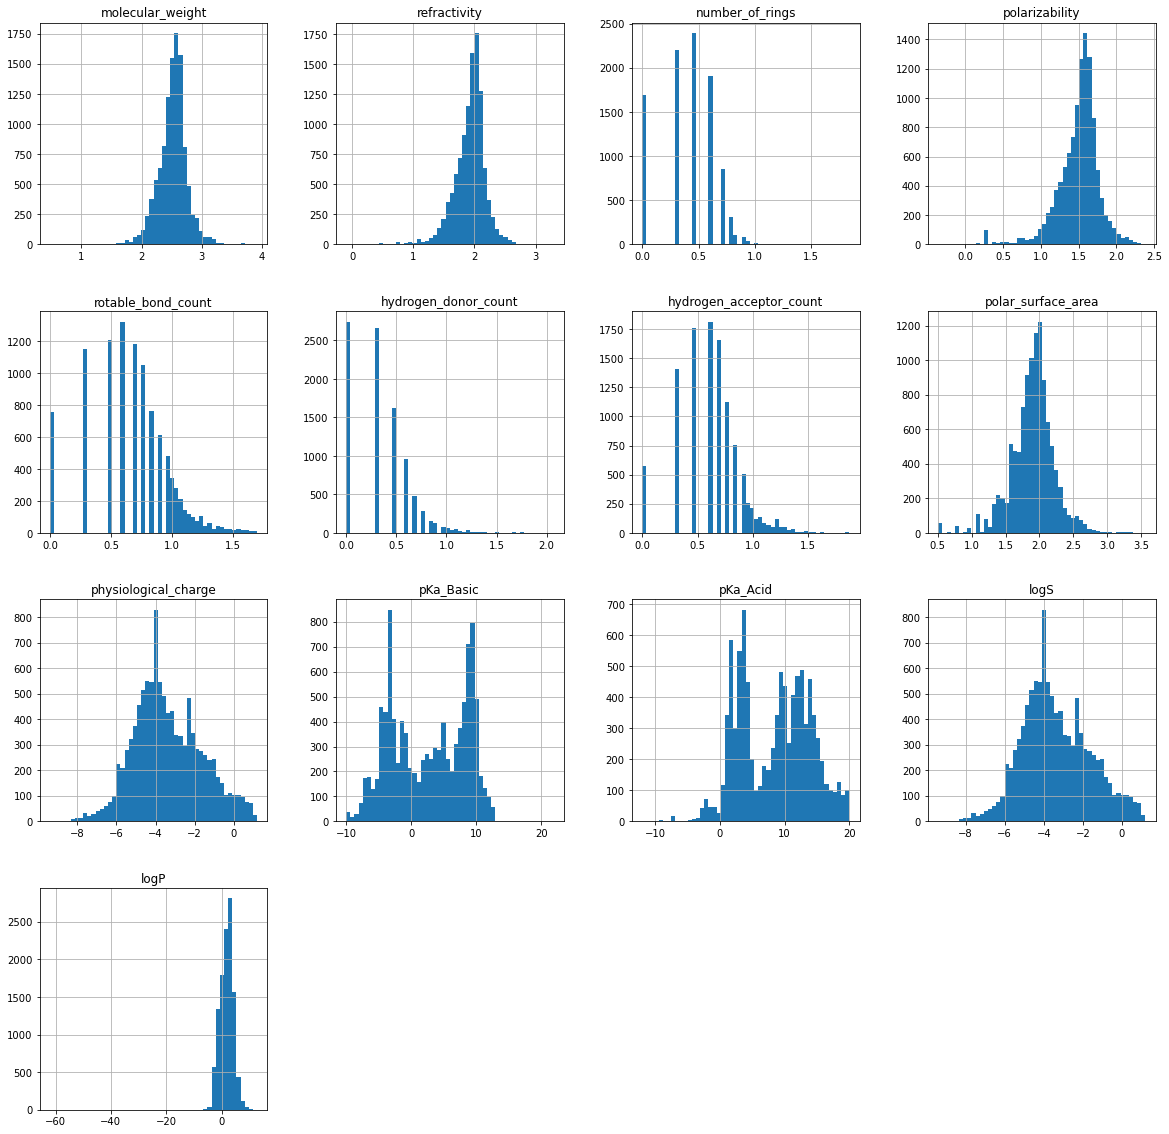

In [27]:
df_concat.hist(bins = 50 ,figsize=(20,20))

In [25]:
def plot_hist_panel(df_concat):

    cords = []
    for i in range(4):
        for j in range(4):
            cords.append((i,j))
    nrow = 4
    ncol = 4

    l=0.1
    r=0.9
    b=0.1
    t=0.9
    w=0.2
    h=0.2
    
    subx=10
    suby=8
    
    figx=l+(1-r)+(ncol-1)*w+ncol*subx
    figy=b+(1-t)+(nrow-1)*h+nrow*suby

    fig,ax=plt.subplots(nrow,ncol,figsize=(figx,figy),dpi=300)
    fig.subplots_adjust(left=l,right=r,bottom=b,top=t,wspace=w,hspace=h)

    for  ij, col in zip(cords, df_concat.columns):
        
        data = df_concat
        i,j = ij
        
        ax[i,j].set_title(col, fontsize=17)
        ax[i,j].set_xlabel(f'Value ()', fontsize=15)
        ax[i,j].set_ylabel('Frequency', fontsize=15)
        ax[i,j].tick_params(axis='both', labelsize=15)
        y, x, _ = ax[i,j].hist(data[data.notna()], bins='fd');

        if col != 'bioavailibity':
            line_x = np.arange(x.min(),x.max())
            line_y = [y.max() for _ in range(len(line_x))]
            line = Line2D(line_x, line_y, color='gray', lw=1)
            ax[i,j].add_line(line)
            
            data_mode = data.mode().iloc[0]
            text_x_pos =  data_mode if col != 'XLogP3' else data_mode-32
            ax[i,j].text(text_x_pos, y.max()+1, f"Max Frequency: {y.max()}")
            
            legend_elements=[Line2D([0], [0],marker='o', color='w',markerfacecolor='r', markersize=8, label=f"Max value: {max(data)}"),
                             Line2D([0], [0],marker='o', color='w',markerfacecolor='g', markersize=8, label=f"Min value: {min(data)}"),
                             Line2D([0], [0],marker='o', color='w',markerfacecolor='gray', markersize=8, label=f"Mode: {data_mode}")]
            ax[i,j].legend(handles=legend_elements, loc='upper right')
    plt.suptitle('Propriedades de todos os compostos', fontsize=30)

    plt.show()


    